In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install lazypredict

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('/kaggle/input/capstone-preprocessing/after_preprocessing_and_label_encoder.xlsx')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value
0,1,71,1,0,1,69,0,1,18.41,1,...,1,0,109.95,7634.25,0.00,0,1270.29,8904.54,5,0
1,0,66,0,0,0,8,5,1,5.21,0,...,1,1,94.45,742.95,0.00,0,41.68,784.63,1,1
2,1,36,1,0,1,17,0,0,0.00,0,...,0,2,34.40,592.75,0.00,0,0.00,592.75,3,0
3,0,36,1,0,0,1,5,0,0.00,0,...,1,0,29.85,29.85,0.00,0,0.00,29.85,3,0
4,1,56,0,0,0,13,0,1,46.92,0,...,1,0,20.40,251.65,0.00,0,609.96,861.61,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,68,0,0,0,1,5,1,45.80,0,...,1,0,69.60,69.60,0.00,0,45.80,115.40,2,1
7039,0,29,0,0,0,27,0,1,1.31,0,...,1,2,56.15,1439.35,0.00,0,35.37,1474.72,3,0
7040,1,69,0,0,0,66,0,1,9.90,1,...,0,1,110.90,7432.05,0.00,0,653.40,8085.45,3,1
7041,1,53,0,0,0,31,0,1,9.27,1,...,1,0,103.45,3066.45,0.00,0,287.37,3353.82,3,1


In [7]:
X = df.drop('Churn Value', axis=1)  # Features
y = df['Churn Value']  # Target variable

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Use LazyClassifier to quickly evaluate a variety of models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:12<00:00,  3.38it/s]

[LightGBM] [Info] Number of positive: 1310, number of negative: 3620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1689
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265720 -> initscore=-1.016447
[LightGBM] [Info] Start training from score -1.016447


100%|██████████| 29/29 [00:12<00:00,  2.27it/s]


In [10]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.95               0.94     0.94      0.95   
LGBMClassifier                     0.96               0.94     0.94      0.96   
LinearSVC                          0.96               0.94     0.94      0.96   
XGBClassifier                      0.96               0.94     0.94      0.96   
AdaBoostClassifier                 0.95               0.94     0.94      0.95   
LogisticRegression                 0.96               0.94     0.94      0.95   
BaggingClassifier                  0.96               0.94     0.94      0.96   
RandomForestClassifier             0.96               0.93     0.93      0.96   
DecisionTreeClassifier             0.94               0.93     0.93      0.94   
SGDClassifier                      0.95               0.93     0.93      0.95   
CalibratedClassifierCV      

# PassiveAggressiveClassifier

In [11]:
# from sklearn.linear_model import PassiveAggressiveClassifier
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFE

# pac = PassiveAggressiveClassifier(random_state = 42)
# rfe = RFE(estimator=pac)
# rfe.fit(X_train, y_train)

In [12]:
# selected_feature_indices = rfe.support_

In [13]:
# plt.figure(figsize=(9, 7))
# plt.barh(range(31), importances[indices], align='center')
# plt.yticks(np.arange(n_features), X_train.columns[indices])
# for index, value in enumerate(importances[indices]):
#     plt.text(value, index, str(round(float(value), 3)))  # Convert to float before rounding
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()


# LGBMClassifier

In [14]:
from lightgbm import LGBMClassifier

# Assuming df is your dataframe
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9]+', '_', regex=True)

lgbm = LGBMClassifier(criterion = "entropy", random_state = 42,max_depth = 10)
lgbm.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1310, number of negative: 3620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1666
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265720 -> initscore=-1.016447
[LightGBM] [Info] Start training from score -1.016447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

LGBMClassifier(criterion='entropy', max_depth=10, random_state=42)

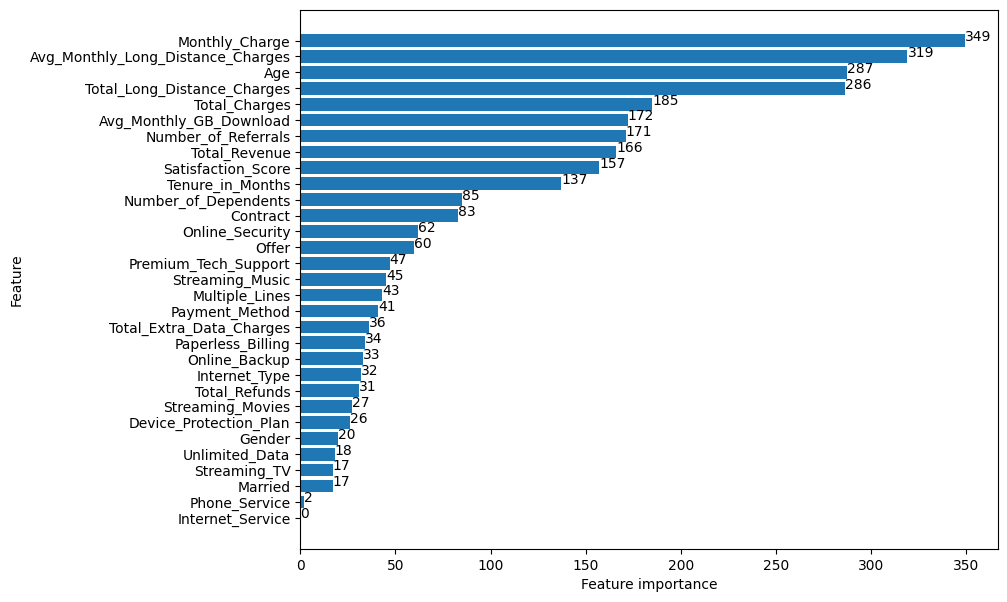

In [15]:
# Get the feature importance for all the features, from the decision tree classifier
v=0
importances = lgbm.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), importances[indices], align='center')
plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
    v=v+value
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# XG Boost

In [16]:
# Fit the data with decision tree classifier to identify feature importance
from xgboost import XGBClassifier


xgb = XGBClassifier(criterion = "entropy", random_state = 42,max_depth = 10)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

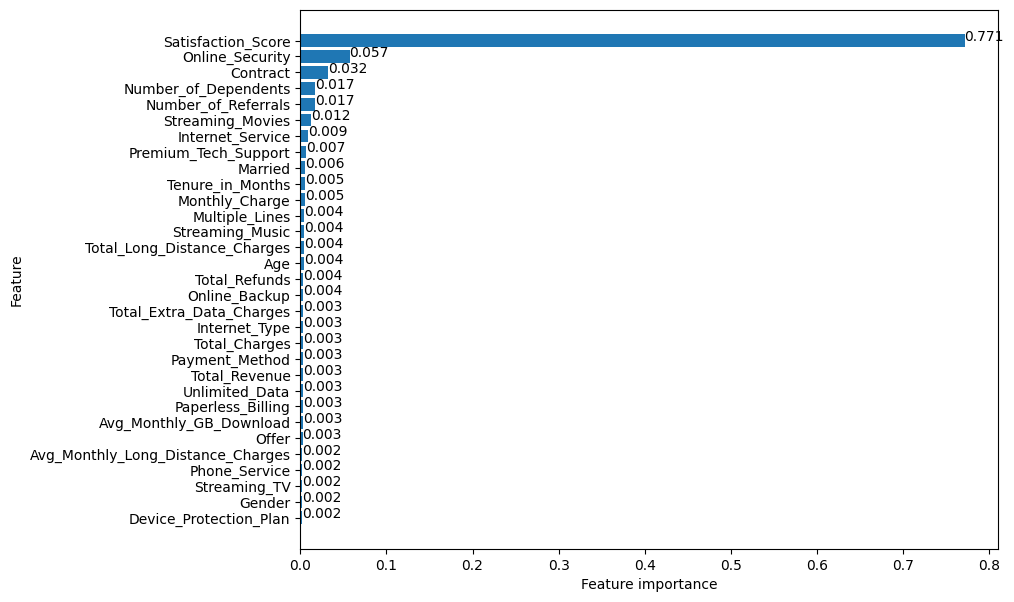

In [17]:
# Get the feature importance for all the features, from the decision tree classifier

importances = xgb.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), importances[indices], align='center')
plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# AdaBoostClassifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

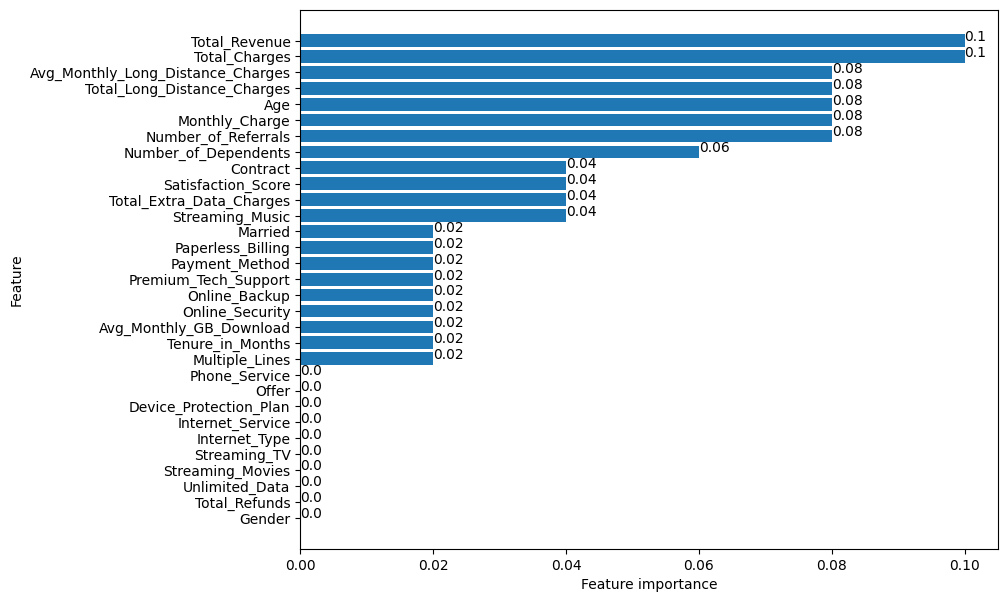

In [19]:
# Get the feature importance for all the features, from the decision tree classifier

importances = ada.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), importances[indices], align='center')
plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# LogisticRegression

In [20]:
# from sklearn.feature_selection import RFE

# log_reg = LogisticRegression()
# rfe = RFE(estimator=log_reg)  # Select top 5 features
# rfe.fit(X_train, y_train)

In [21]:
# plt.figure(figsize=(9, 7))
# plt.barh(range(n_features), importances[indices], align='center')
# plt.yticks(np.arange(n_features), X_train.columns[indices])
# for index, value in enumerate(importances[indices]):
#     plt.text(value, index, str(round(float(value), 3)))  # Convert to float before rounding
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()


# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

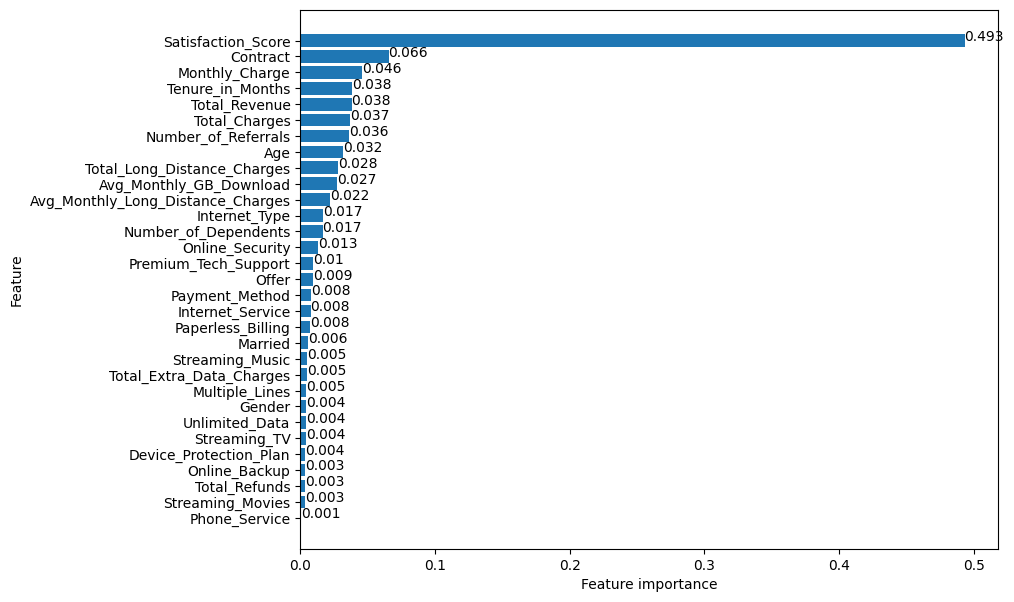

In [23]:
# Get the feature importance for all the features, from the decision tree classifier

importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), importances[indices], align='center')
plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()